# Exercise: AutoGluon

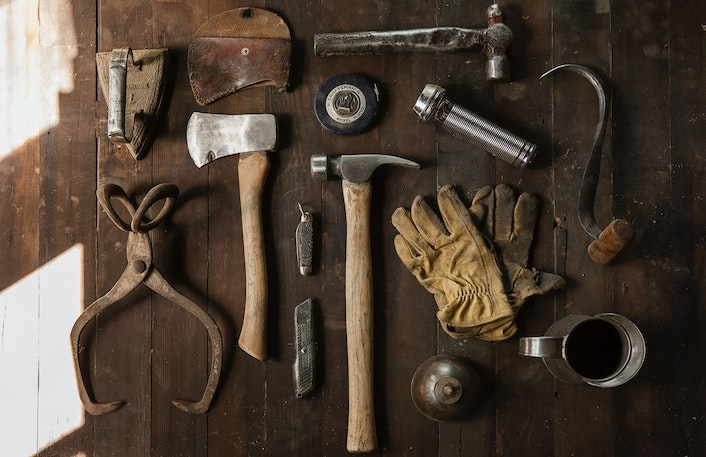

Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [1]:
! python --version

Python 3.10.14


In [2]:
!pip install -U pip
!pip install pandas
!pip install -U setuptools wheel
!pip install numpy
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

  Using cached pip-24.1.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\LEGION\anaconda3\envs\ag\python.exe -m pip install -U pip


  Using cached pandas-2.2.2-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.0.0-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp310-cp310-win_amd64.whl (11.6 MB)
Using cached numpy-2.0.0-cp310-cp310-win_amd64.whl (16.5 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Using cached setuptools-70.3.0-py3-none-any.whl.metadata (5.8 kB)
Using cached setuptools-70.3.0-py3-none-any.whl (931 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.5.1
    Uninstalling setuptools-69.5.1:
      Successfully uninstalled setuptools-69.5.1
  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl.metadata (402 bytes)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Using cached PyYAML-6.0.1-cp310-cp310-win_amd64.whl.metadata (2.1 kB

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [328 lines of output]
      Running from numpy source directory.
      C:\Users\LEGION\AppData\Local\Temp\pip-install-upvsz0ia\numpy_891a0cc1538a41df922d77eb0374011a\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
        return is_string(s) and ('*' in s or '?' is s)
      blas_opt_info:
      blas_mkl_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries mkl_rt not found in ['C:\\Users\\LEGION\\anaconda3\\envs\\ag\\lib', 'C:\\', 'C:\\Users\\LEGION\\anaconda3\\envs\\ag\\libs', 'C:\\Users\\LEGION\\anaconda3\\Library\\lib']
        NOT AVAILABLE
      
      blis_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries blis not found in ['C:\\

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     -------------------------------------- 61.0/61.0 kB 406.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 991.0 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 991.0 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 991.0 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 321.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------

   ------------------- -------------------- 111.7/228.5 MB 1.3 MB/s eta 0:01:31
   ------------------- -------------------- 111.8/228.5 MB 1.3 MB/s eta 0:01:31
   ------------------- -------------------- 111.8/228.5 MB 1.3 MB/s eta 0:01:31
   ------------------- -------------------- 111.9/228.5 MB 1.3 MB/s eta 0:01:31
   ------------------- -------------------- 111.9/228.5 MB 1.3 MB/s eta 0:01:31
   ------------------- -------------------- 112.0/228.5 MB 1.3 MB/s eta 0:01:31
   ------------------- -------------------- 112.0/228.5 MB 1.3 MB/s eta 0:01:31
   ------------------- -------------------- 112.1/228.5 MB 1.3 MB/s eta 0:01:31
   ------------------- -------------------- 112.1/228.5 MB 1.3 MB/s eta 0:01:30
   ------------------- -------------------- 112.2/228.5 MB 1.3 MB/s eta 0:01:30
   ------------------- -------------------- 112.2/228.5 MB 1.3 MB/s eta 0:01:30
   ------------------- -------------------- 112.2/228.5 MB 1.3 MB/s eta 0:01:31
   ------------------- -----------------

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

c:\Users\LEGION\anaconda3\envs\ag\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## AutoGluon Classifier

In [4]:
# Load in the wine dataset
wine = datasets.load_wine()

In [5]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])

# Include the target as well
df["target"] = wine["target"]

In [6]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [7]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(label="target").fit(
    train_data=df_train, time_limit=120, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels\ag-20240711_093638"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          12
Memory Avail:       4.20 GB / 15.87 GB (26.5%)
Disk Space Avail:   206.03 GB / 465.76 GB (44.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdo

In [8]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         LightGBMXT_BAG_L2   0.992958    accuracy       0.389897  27.409186                0.007017           3.142731            2       True         11
1       WeightedEnsemble_L3   0.992958    accuracy       0.460010  35.618689                0.000000           0.113576            3       True         12
2    NeuralNetFastAI_BAG_L2   0.992958    accuracy       0.460010  35.505113                0.077130          11.238658            2       True         10
3           LightGBM_BAG_L1   0.985915    accuracy       0.008014   3.129750                0.008014           3.129750            1       True          5
4         LightGBMXT_BAG_L1   0.985915    accuracy       0.008389   3.451459                0.008389           3.451459            1       True          4
5       

c:\Users\LEGION\anaconda3\envs\ag\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6619718309859155,
  'KNeighborsDist_BAG_L1': 0.7112676056338029,
  'NeuralNetFastAI_BAG_L1': 0.9859154929577465,
  'LightGBMXT_BAG_L1': 0.9859154929577465,
  'LightGBM_BAG_L1': 0.9859154929577465,
  'RandomForestGini_BAG_L1': 0.9859154929577465,
  'RandomForestEntr_BAG_L

<Axes: xlabel='model'>

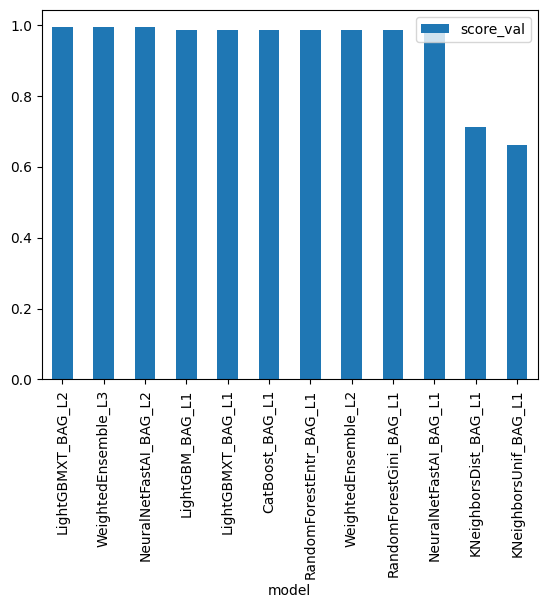

In [9]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [10]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(df_test)

## AutoGluon Regression

In [11]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [12]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])

# Include the target as well
dfd["target"] = diabetes["target"]

In [13]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2, random_state=0)

In [14]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# Since we are using a different eval_metric, we'll need to assign the problem_type
predictor = TabularPredictor(
    label="target", problem_type="regression", eval_metric="r2"
).fit(
    train_data=dfd_train,
    time_limit=120,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels\ag-20240711_093843"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          12
Memory Avail:       4.12 GB / 15.87 GB (26.0%)
Disk Space Avail:   206.02 GB / 465.76 GB (44.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdo

In [15]:
# Output the fit summary of the training run
predictor.fit_summary()

c:\Users\LEGION\anaconda3\envs\ag\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.556339          r2       0.066090  13.315733                0.001005           0.116087            2       True         12
1    NeuralNetTorch_BAG_L1   0.531242          r2       0.052507  11.538201                0.052507          11.538201            1       True         10
2        LightGBMXT_BAG_L1   0.531077          r2       0.012578   1.661445                0.012578           1.661445            1       True          3
3          CatBoost_BAG_L1   0.511893          r2       0.020051   4.753336                0.020051           4.753336            1       True          6
4     ExtraTreesMSE_BAG_L1   0.497069          r2       0.089239   0.680396                0.089239           0.680396            1       True          7
5          Lig

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.43052099899418794,
  'KNeighborsDist_BAG_L1': 0.4397005764934093,
  'LightGBMXT_BAG_L1': 0.5310771377310223,
  'LightGBM_BAG_L1': 0.49613066803956196,
  'RandomForestMSE_BAG_L1': 0.470163735946484,
  'CatBoost_BAG_L1': 0.5118926845535071,
  'ExtraTreesMSE_BAG_L1': 

<Axes: xlabel='model'>

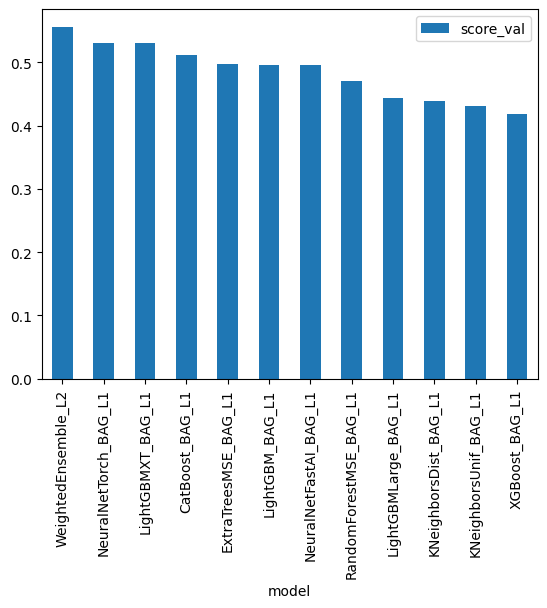

In [16]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [17]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)